# Diamonds are a girl's best friend

We love diamonds.

## Characteristics

Name | Descriptions
-----|--------
carat |	Carat weight of the diamond
cut	| Describe cut quality of the diamond. Quality in increasing order **Fair**, **Good**, **Very Good**, **Premium**, **Ideal**
color	| Color of the diamond, with **D** being the best and **J** the worst
clarity	|How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) **FL**, **IF**, **VVS1**, **VVS2**, **VS1**, **VS2**, **SI1**, **SI2**, **I1**, **I2**, **I3**
depth	| depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
table | table%: The width of the diamond's table expressed as a percentage of its average diameter
price	| The price of the diamond in muggle money
x	| length of the diamond in mm
y	| width of the diamond in mm
z	| depth of the diamond in mm


In [50]:


import pandas as pd;

krenk_diamonds = {'carat': [0.71, 0.83, 0.5, 0.39, 0.32, 0.9, 0.51, 1.12, 0.4, 0.36],
'cut':  ['Good', 'Ideal', 'Ideal', 'Premium', 'Premium','Good', 'Ideal', 'Ideal', 'Ideal', 'Premium'],
                  'color': ['I', 'G', 'E', 'J', 'G', 'F', 'D', 'G', 'G', 'I'],
                  'clarity': ['VVS2', 'VS1', 'VS2', 'VS1', 'VS1', 'SI2', 'VS1', 'VVS2', 'VVS2', 'VS2'],
                  'depth': [63.1, 62.1, 61.5, 61.6, 62.1, 63.3, 60.9, 62.1, 62.4, 62.7],
                  'table': [8,55, 55, 59,56, 57, 57, 54.8, 56, 59],
                  'x': [5.64, 6.02, 5.11, 4.67, 4.43, 6.08, 5.2, 6.64, 4.72, 4.54],
                  'y': [5.71, 6.05, 5.16, 4.71, 4.4, 6.14, 5.17, 6.66, 4.74, 4.58],
                  'z' : [3.58, 3.75, 3.16, 2.89, 2.74, 3.87, 3.16, 4.13, 2.95, 2.86]
}

krenk_df = pd.DataFrame(krenk_diamonds)

df = pd.read_csv('diamonds_data.csv')

# peek on data set
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 10 columns):
carat      53930 non-null float64
cut        53930 non-null object
color      53930 non-null object
clarity    53930 non-null object
depth      53930 non-null float64
table      53930 non-null float64
price      53930 non-null int64
x          53930 non-null float64
y          53930 non-null float64
z          53930 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
              carat         depth         table         price             x  \
count  53930.000000  53930.000000  53930.000000  53930.000000  53930.000000   
mean       0.797976     61.749325     57.457328   3933.054942      5.731236   
std        0.474035      1.432711      2.234578   3989.628569      1.121807   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.70

I can see minimum of x,y and x is zero. So, I'll take a look on. 

In [51]:
print(df.query('x == 0 or y == 0 or z == 0'))

       carat        cut color clarity  depth  table  price     x     y    z
2206    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2313    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4790    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5470    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10166   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11181   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11961   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13599   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15949   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24390   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24516   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26119   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26239   1.20

I'm no lapidarist, but diamonts are 3D objects. Hence, there is no possibility have some dimension with zero value. So I'll drop then from dataset.

In [52]:
df.query('x > 0 and y > 0 and z >0', inplace=True)
print(df.describe())

              carat         depth         table         price             x  \
count  53910.000000  53910.000000  53910.000000  53910.000000  53910.000000   
mean       0.797734     61.749434     57.456978   3931.248210      5.731706   
std        0.473819      1.432420      2.234152   3987.469164      1.119469   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53910.000000  53910.000000  
mean       5.734962      3.540089  
std        1.140175      0.702560  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


Now I'll check for categorical values

In [53]:
print(df['color'].unique())
print(df['clarity'].unique())
print(df['cut'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


Hence I encode only present values.

In [54]:
clean_cats = {'cut': {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1},
              'color': { 'D':7, 'E':6, 'F': 5, 'G':4, 'H':3,'I':2, 'J':1},
              'clarity': {'IF':8, 'VVS1':7,  'VVS2':6, 'VS1':5, 'VS2':4, 'SI2':3, 'SI1':2, 'I1':1 }}

df.replace(clean_cats, inplace=True)

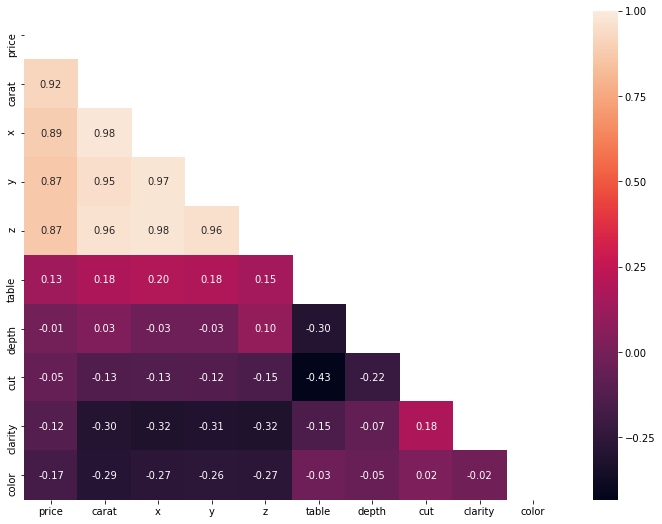

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#correlation matrix 

f, ax = plt.subplots(figsize=(12, 9))
k = 10 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)

# Remove the upper triangle
triangle = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(triangle)] = True


hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True,  fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


We can see, only the **size** matters! 

I prepare datasets with meaningfull data.

In [63]:
X=df[['carat','x','y','z']]
y=df['price']


krenk_df = krenk_df[['carat','x','y','z']]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()
diamond_model = model.fit(X_train, y_train)
print(diamond_model.predict(krenk_df))
#predict_train = diamond_model.predict(X_train)
#predict_test = diamond_model.predict(X_test)
#print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train))
#print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test))

MemoryError: could not allocate 5602017280 bytes